# Clusterization

## 1. Texts Separation

In [1]:
path = "../../../Texts/text2_12.txt" 

## 2. Experiments With Semantic

In [2]:
import os
import numpy as np
import time
import pickle
from scipy.linalg import block_diag

In [3]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../../model.bin', binary=True) 
#model.init_sims(replace=True)

/home/ased/anaconda3/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
import pickle
with open('../../table.pickle', 'rb') as f:
    table = pickle.load(f)
    f.close()

### 2.1. Trivial Segmentation On Segmented From Programm

In [5]:
from clusterization import trivial_segmentation

list_texts, TT, list_tag_ud = trivial_segmentation(path, model, table[path.split('/')[-1]])
def try_(word):
    mylist = ['CONJ', 'PART', 'ADP', 'PRON', 'DET']
    #mylist = list()
    for i in mylist:
        if i in word:
            return False
    return True
model.init_sims(replace=True)
def get_vector(sent, model = model):
    s =np.zeros((300,))
    k = 0
    for i in sent:
        if model.__contains__(i) and try_(i):
            s+= model[i]
            k += 1
    return s/k
TT = [get_vector(i) for i in list_tag_ud]

/home/ased/Desktop/PROJECTS/SearchScript/SemanticAnalysis/Experiments/TextsClusters/clusterization.py:91: RuntimeWarning: invalid value encountered in true_divide
  return s/k


In [6]:
print(len(TT), len(list_texts))
for i in list_texts:
    print(i, '\n')

123 123
Инструкция по покупке подержанного авто для «продвинутого чайника»Если Вы твердо решили купить подержанный автомобиль, но в авто особо не разбираетесь – попробуйте следовать нижеприведенным инструкциям. 

 С их помощью Вы сможете увеличить свои шансы купить авто, которое действительно стоит тех денег, которые Вы за него готовы отдать. Итак, поехали! 

Подготовка Точно определитесь с суммой, которую Вы готовы потратить на приобретение автомобиля. 

 Вычтите из нее 10% - оставшиеся 90% будут той максимальной ценой, по которой Вы сможете купить авто. 10% уйдут на оформление купли/продажи, постановку на учет, страхование, замену расходников и прочие мелкие расходы, связанные с покупкой и приобретением машины. 

 Морально настройтесь на длительные поиски. 

 Как показывает опыт, время, потраченное на поиски, обычно пропорционально состоянию найденного авто. Хотя, конечно, бывают и приятные исключения. Определитесь (хотя бы примерно) с маркой и моделью автомобиля, который хотите прио

### 2.2. Union Of Segments

You can see that each segment is linked by one sence and has not some excess sentences. But there are segmentes that should be united. An example of such pairs is the pair of the first and second segments. It is one script step that can be named 'Request Generation'.

In [7]:
marks = [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]

In [8]:
n  =lambda x: x/np.linalg.norm(x)
#D = [(ind, marks[ind],
#      model.wmdistance(list_tag_ud[ind], list_tag_ud[ind+1])-np.exp(-0.1*min(len(list_tag_ud[ind]), len(list_tag_ud[ind+1]))), 
#      model.wmdistance(list_tag_ud[ind], list_tag_ud[ind+1]), 
#      list_texts[ind], list_texts[ind+1]) for ind, i in enumerate(TT[:-1])]
C1, C2 = 1, 2/(sum([len(i) for i in list_tag_ud])/len(list_tag_ud))
D = [(ind, marks[ind],
      model.wmdistance(list_tag_ud[ind], list_tag_ud[ind+1])+ C1/(1+np.exp(-C2*(len(list_tag_ud[ind])+ len(list_tag_ud[ind+1])))), 
      model.wmdistance(list_tag_ud[ind], list_tag_ud[ind+1]), 
      list_texts[ind], list_texts[ind+1]) for ind, i in enumerate(TT[:-1])]

122 122
46


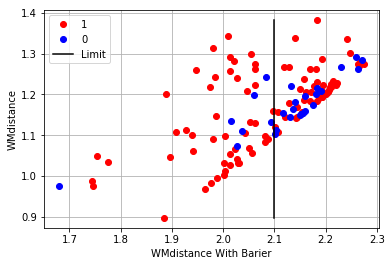

In [9]:
x = [i[2] for i in D]
y = [i[3] for i in D]
eps = 2.1
for ind, i in enumerate(x):
    if np.isnan([i]).any():
        x[ind] = max(x)
print(len(marks), len(x))
import matplotlib.pyplot as plt
% matplotlib inline
cur_x = [i for ind,i in enumerate(x) if marks[ind]==1]
print(len([i for i in cur_x if i > eps]))
cur_y = [i for ind,i in enumerate(y)if marks[ind]==1]
plt.plot(cur_x, cur_y, 'ro')
cur_x = [i for ind,i in enumerate(x) if marks[ind]==0]
cur_y = [i for ind,i in enumerate(y)if marks[ind]==0]
plt.plot(cur_x, cur_y, 'bo')
plt.plot([eps for i in range(2)], [min(y), max(y)], 'black')
plt.legend(['1', '0', 'Limit'])
plt.xlabel('WMdistance With Barier')
plt.ylabel('WMdistance')
plt.grid()

We chose metric WMdistance with $\epsilon = 2.1$

## 3. Classification

In [88]:
import pickle
with open('MarkedSegments.pickle', 'rb') as f:
    d = pickle.load(f)
    f.close
new_d = dict()
for i in d:
    if not d[i][0][3] is None:
        new_d[i] = d[i]
d = new_d

In [33]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../../model.bin', binary=True) 
#model.init_sims(replace=True)

/home/ased/anaconda3/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [89]:
def update(elem, model = model):
    def cond(word):
        res = True
        bad_list = ['CONJ', 'DET', 'PRON', 'PART']
        for i in bad_list:
            res = res and not (i in word)
        return res
    s = np.zeros((300,))
    for i in elem[2]:
        if model.__contains__(i) and cond(i):
            s+= model[i]
    return (elem[0], s/np.linalg.norm(s), elem[3])
new_d  =list()
for i in d:
    cur = list()
    for j in d[i]:
        cur.append(update(j))
    new_d += (cur)
d = new_d

In [90]:
import numpy as np
data = d
data_dict = dict()
for i in data:
    if data_dict.__contains__(i[2]):
        data_dict[int(i[2])] += 1
    else:
        data_dict[int(i[2])] = 1
_ = [key for key in data_dict if data_dict[key]<6] + [12]
data_copy = data.copy()
data = [(i[0],i[1],int(i[2])) for i in data if not int(i[2]) in _]
size_train = 0.8
print('Distribution', data_dict)
print('Ignore List', _)
print('Size data', len(data))
print('Size train',size_train)

Distribution {0: 16, 1: 18, 2: 33, 3: 21, 4: 45, 5: 2, 6: 45, 7: 225, 8: 74, 9: 31, 10: 13, 11: 16, 12: 45}
Ignore List [5, 12]
Size data 537
Size train 0.8


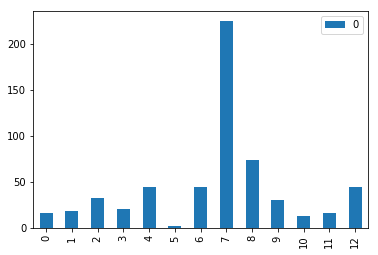

In [54]:
import pandas
%matplotlib inline
from collections import Counter
df = pandas.DataFrame.from_dict(data_dict, orient='index')
df.plot(kind='bar')

#### Distances Distribution

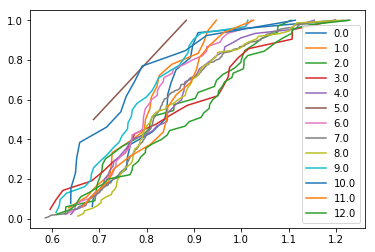

In [55]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
new = dict()
for i in data_copy:
    if new.__contains__(i[2]):
        new[i[2]].append(i[1])
    else:
        new[i[2]] = [i[1]]
distances = {key:[np.linalg.norm(center-i) for i in new[key]] for key in new}
keys = new.keys()
import matplotlib.pyplot as plt
%matplotlib inline
for key in keys:
    distances[key].sort()
    y = [(ind+1)/len(distances[key]) for ind, i in enumerate(distances[key])]
    plt.plot(distances[key], y)
plt.legend(keys)
plt.show()

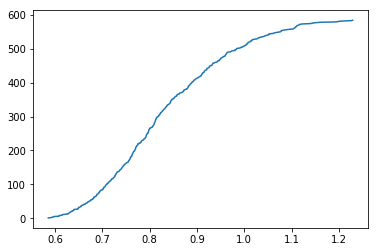

In [56]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
distances = [np.linalg.norm(center-i) for i in vectors]
distances.sort()
y = [ind+1 for ind,i in enumerate(distances)]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(distances, y)
plt.show()

#### Visualisation

ERROR:root:Line magic function `%matplotlin` not found.


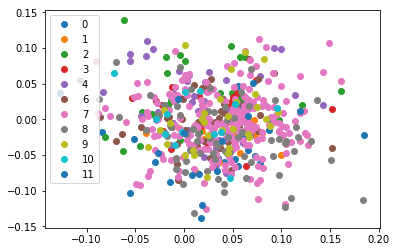

In [57]:
from sklearn.decomposition import PCA
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlin inline
for cur in classes:
    plt.plot([X[ind,0] for ind,i in enumerate(Y) if i==cur],
             [X[ind,1] for ind,i in enumerate(Y) if i==cur], 'o')
plt.legend(classes)
plt.show()

### 3.1. Trivial Classification

In current section we will determine class of text on the nearest center of class that was got from training data.

In [72]:
import random
def trivial(train, test):
    data_dict = dict()
    for i in train:
        if data_dict.__contains__(i[2]):
            data_dict[int(i[2])].append(i[1])
        else:
            data_dict[int(i[2])] = [i[1]]
    centers = {i:sum(data_dict[i])/len(data_dict[i]) for i in data_dict}
    answers = list()
    for i in test:
        _ = {j:np.linalg.norm(centers[j]-i[1]) for j in centers}
        answer = None
        for key in _.keys():
            if answer is None or _[answer]>_[key]:
                answer = key
        answers.append(answer)
    return answers

In [73]:
def get_sets(data, size_train, all_data):
    res = {}
    for i in data:
        if res.__contains__(i[2]):
            res[i[2]].append(i)
        else:
            res[i[2]] = [i]
    train = list()
    for i in res:
        cur = int(size_train*len(res[i]))
        train+=res[i][:cur]
    test=list()
    if all_data:
        for i in res:
            test+=res[i]
    else:
        for i in res:
            cur = int(size_train*len(res[i]))
            test+=res[i][cur:]
    return train,test

In [74]:
def metric(results, arg = 13):
    D = np.zeros((arg, arg))
    def update(some_dict, key):
        if some_dict.__contains__(key):
            some_dict[key] += 1
        else:
            some_dict[key]=1
    TP, FP, FN = {}, {}, {}
    acc = 0
    _ = dict()
    for i in results:
        D[i[0], i[1]] += 1
        if i[0]==i[1]:
            acc+=1
        _[i[0]] = None
        _[i[1]] = None
        if i[0]==i[1]:
            update(TP, i[1])
        else:
            update(FP, i[1])
            update(FN, i[0])
    for i in _.keys():
        if not TP.__contains__(i):
            TP[i]=0
        if not FP.__contains__(i):
            FP[i]=0
        if not FN.__contains__(i):
            FN[i]=0
    precision, recall = {}, {}
    for i in _.keys():
        try:
            precision[i] = TP[i]/(TP[i]+FP[i])
        except Exception:
            precision[i]=0
        try:
            recall[i] = TP[i]/(TP[i]+FN[i])
        except Exception:
            recall[i]=0
    return precision, recall, acc/len(results), D
            
def test_method(data, size_train,repeat,classificator=trivial, arg = 13, all_data = False):
    prec, recall, acc = dict(), dict(), 0
    D = np.zeros((arg,arg))
    for i in range(repeat):
        shuffled_data=data.copy()
        random.shuffle(shuffled_data)
        train, test = get_sets(shuffled_data, size_train, all_data)
        answers = classificator(train, test)
        results = [(i[2], answers[ind]) for ind,i in enumerate(test)]
        cur_prec, cur_recall, cur_acc, cur_D = metric(results, arg)
        for i in cur_prec:
            if prec.__contains__(i):
                prec[i]+=(cur_prec[i]/repeat)
            else:
                prec[i]=cur_prec[i]/repeat
        for i in cur_recall:
            if recall.__contains__(i):
                recall[i]+=(cur_recall[i]/repeat)
            else:
                recall[i]=cur_recall[i]/repeat
        acc+=(cur_acc/repeat)
        D += cur_D/repeat
    return prec, recall, acc, D

#### Results On Tested Data

In [75]:
prec, recall, acc, D = test_method(data, size_train, 1000)
print('Accuracy', acc)
keys = list(prec.keys())
keys.sort()
print('Key\tPrec\tRecall')
mean_prec, mean_recall = 0, 0
for key in keys:
    mean_prec += prec[key]
    mean_recall += recall[key]
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))
print("Mean\t%.2f\t%.2f"%(mean_prec/len(keys), mean_recall/len(keys)))

Accuracy 0.5495803571428576
Key	Prec	Recall
0	0.51	0.49
1	0.34	0.37
2	0.63	0.47
3	0.15	0.34
4	0.51	0.28
6	0.54	0.64
7	0.85	0.60
8	0.55	0.67
9	0.38	0.56
10	0.24	0.38
11	0.63	0.63
Mean	0.49	0.49


In [76]:
D = D[keys].T[keys].T
import pandas as pd
pd.DataFrame(D,
            columns = keys,
            index = keys)

,0,1,2,3,4,6,7,8,9,10,11
0,1.976,0.400,0.000,0.438,0.000,0.387,0.057,0.013,0.318,0.234,0.177
1,0.749,1.469,0.160,0.155,0.000,0.244,0.000,0.000,1.032,0.090,0.101
2,0.001,0.263,3.306,0.783,0.179,0.206,0.680,0.000,1.356,0.194,0.032
3,0.246,0.236,0.333,1.700,0.062,0.444,0.608,0.472,0.172,0.727,0.000
4,0.009,0.283,0.015,1.352,2.532,2.500,0.932,0.254,0.525,0.405,0.193
6,0.470,0.269,0.182,0.744,0.934,5.741,0.000,0.096,0.196,0.366,0.002
7,0.068,0.620,0.874,4.174,0.854,0.633,27.154,7.271,1.540,1.161,0.651
8,0.047,0.003,0.033,1.267,0.252,0.032,2.471,10.100,0.391,0.395,0.009
9,0.482,0.607,0.417,0.567,0.141,0.231,0.003,0.000,3.931,0.093,0.528
10,0.053,0.218,0.108,0.740,0.079,0.364,0.002,0.004,0.271,1.141,0.020


### 3.2. Logistic Regression

In [91]:
def get_sets1(data, size_train, N_blocks):
    def mysplit(some_list, N):
        l = len(some_list)
        k, m = l//N, l%N
        lengths = [k+1 for i in range(m)]+[k for i in range(N-m)]
        cur = 0
        res = list()
        for i in lengths:
            res.append(some_list[cur:cur+i])
            cur+=i
        return res
    res = {}
    for i in data:
        if res.__contains__(i[2]):
            res[i[2]].append(i)
        else:
            res[i[2]] = [i]
    train = list()
    for i in res:
        cur = int(size_train*len(res[i]))
        train+=res[i][:cur]
    test=list()
    for i in res:
        cur = int(size_train*len(res[i]))
        test+=res[i][cur:]
    random.shuffle(train)
    return mysplit(train, N_blocks),test

In [98]:
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
transformed_data = [(None, i, Y[ind]) for ind,i in enumerate(X)]
import random
random.shuffle(transformed_data)
blocks, test =get_sets1(transformed_data, 0.8, 10)

In [99]:
from sklearn.linear_model import LogisticRegression
repeat = len(blocks)
res = dict()
f = (lambda x: np.hstack((x, x*np.log(np.absolute(x)))))
from sklearn.decomposition import PCA

for ind,b in enumerate(blocks):
    train, _, cur_test = list(), [j for cur_ind, j in enumerate(blocks) if cur_ind!=ind], b
    for j in _:
        train += j
    for j in range(1, 11):
        clf = LogisticRegression(penalty='l2', C = j, multi_class = 'ovr', solver = 'liblinear')
        X = f(np.array([i[1] for i in train]))
        clf.fit(X, np.array([i[2] for i in train]))
        if res.__contains__(j):
            X = f(np.array([i[1] for i in cur_test]))
            res[j] += clf.score(X, np.array([i[2] for i in cur_test]))
        else:
            X = f(np.array([i[1] for i in cur_test]))
            res[j] = clf.score(X, np.array([i[2] for i in cur_test]))
res = {i:res[i]/repeat for i in res}
keys = list(res.keys())
keys.sort()
for i in keys:
    print(i, res[i])

1 0.6115171650055371
2 0.6044850498338871
3 0.602325581395349
4 0.5951827242524919
5 0.5903654485049834
6 0.5856035437430787
7 0.5832779623477299
8 0.580952380952381
9 0.5739756367663345
10 0.5692691029900332


In [103]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C = 2, multi_class = 'ovr', solver = 'liblinear')
f = lambda x: np.hstack((x, x*np.log(np.absolute(x))))
train = list()
for i in blocks:
    train += i
clf.fit(f(np.array([i[1] for i in train])), np.array([i[2] for i in train]))
pred = clf.predict(f(np.array([i[1] for i in test])))
results = [(i[2], pred[ind]) for ind,i in enumerate(test)]
prec, recall, acc, D = metric(results)
print('Accuracy', acc)
keys = classes
keys.sort()
print('Key\tPrec\tRecall')
mean_prec, mean_recall = 0, 0
for key in keys:
    mean_prec += prec[key]
    mean_recall += recall[key]
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))
print("Mean\t%.2f\t%.2f"%(mean_prec/len(keys),mean_recall/len(keys)))


Accuracy 0.6696428571428571
Key	Prec	Recall
0	0.50	0.50
1	1.00	0.25
2	0.67	0.29
3	0.00	0.00
4	0.50	0.44
6	0.55	0.67
7	0.72	0.93
8	0.77	0.67
9	0.71	0.71
10	0.33	0.33
11	1.00	0.50
Mean	0.61	0.48


In [104]:
D = D[keys].T[keys].T
import pandas as pd
pd.DataFrame(D,
            columns = keys,
            index = keys)

,0,1,2,3,4,6,7,8,9,10,11
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,2.0,42.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
10,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
